In [2]:
import numpy as np
import matplotlib.pyplot as plt


# clos

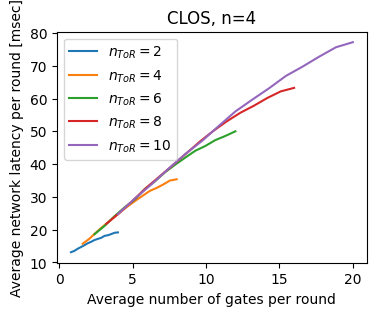

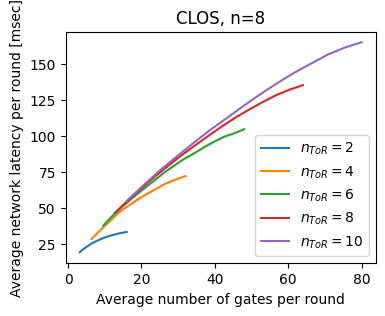

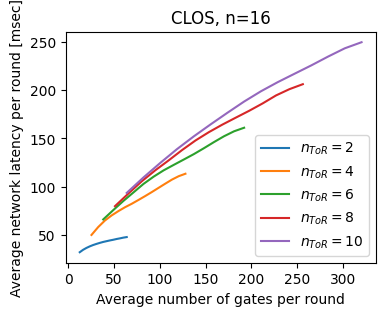

In [9]:
n_list = [4,8,16] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

linewidth_list = np.array([1,3,10])*1e9 # photon linewidth in GHz
reset_time_list = np.array([0.1,1,3,10])*1e-6
Nrep = 28 # No. of repetitions for saving separate files

for n in n_list:
    plt.figure(figsize=(4,3))
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        num_ToR_list = f1['arr_0'] 
        lam_gate_list = f1['arr_1'] 
        num_node_list = f1['arr_2'] 
        if i_rep ==0:
            Ntot = np.zeros((len(num_ToR_list),len(lam_gate_list)))
            Tavg = np.zeros((len(num_ToR_list),len(lam_gate_list)))
        Nq = f1['arr_3']
        Ntot += Nq
        Tavg += f1['arr_4'] * Nq

    Tavg = Tavg/Ntot
    for i_tor, num_ToR in enumerate(num_ToR_list):
        # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
        plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",label=r"$n_{ToR}=$"+f"{num_ToR}")

    plt.legend()
    # plt.xlim(0,200)
    # plt.ylim(1,250)
    plt.title(f"CLOS, n={n}")
    plt.xlabel("Average number of gates per round")
    plt.ylabel("Average network latency per round [msec]")
    plt.show()